In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST(''
                       , train = True
                       , download = False
                       , transform = transforms.Compose([transforms.ToTensor()])
                      )

test = datasets.MNIST(''
                      , train = True
                      , download = False
                      , transform = transforms.Compose([transforms.ToTensor()])
                     )

train_set = torch.utils.data.DataLoader(train
                                       , batch_size = 10
                                       , shuffle = True
                                      )

test_set = torch.utils.data.DataLoader(test
                                       , batch_size = 10
                                       , shuffle = True
                                      )

In [2]:
# torch.nn and torch.nn.function are very similar 

import torch.nn as nn # OOP in pyTorch, initialize things
import torch.nn.functional as F # functions in pyTorch, pass parameters

In [3]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() 
        self.fc1 = nn.Linear(28*28, 64) # input is 28 x 28 pixels, output is 64
        self.fc2 = nn.Linear(64, 64) 
        self.fc3 = nn.Linear(64, 64) 
        self.fc4 = nn.Linear(64, 10) # last output is 10 classes
        
    def forward(self, x): # defines how the data will flow through network
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) 
    
        return F.log_softmax(x, dim = 1) # softmax usually works for multi classifier, dim = 1 default?
    
net = Net()
net        

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [4]:
X = torch.rand((28, 28))
X = X.view(-1,28*28) # -1 means unknown shape or size

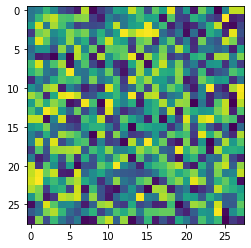

In [5]:
import matplotlib.pyplot as plt

plt.imshow(X.view(28, 28));

In [6]:
output = net(X)
output # predictions

tensor([[-2.3660, -2.2415, -2.2109, -2.2866, -2.5083, -2.2654, -2.4047, -2.2808,
         -2.2842, -2.2157]], grad_fn=<LogSoftmaxBackward>)